#**2. Spark SQL**

1. 목적
  - 스파크 프로그래밍 내부에서 관계형 처리를 하기 위해
  - 스키마의 정보를 이용해 자동으로 최적화를 하기 위해
  - 외부 데이터셋을 사용하기 쉽게 하기 위해


2. **DataFrame**
  - Spark Core에 RDD가 있다면 Spark SQL엔 DataFrame 가 있음
  - DataFrame은 테이블 데이터셋이라고 보면 됨
  - 개념적으론 RDD에 스키마가 적용된 것
  - 이점
    - MLLib이나 Spark Streaming 같은 다른 Spark Module들과 사용하기 편함
    - 최적화가 알아서 됨


3. **SparkSession**
  - Spark Core에 SparkContext가 있다면 Spark SQL엔 SparkSession 가 있음


4. Spark에서 사용할 수 있는 SQL문
  - Hive Query Language와 거의 동일
      - Select
      - From
      - Where
      - Count
      - Having
      - Group By
      - Order By
      - Sort By
      - Distinct
      - Join

####**SparkSession과 DataFrame생성**

1. Spark Session

`spark = SparkSession.builder.appName("test-app").getOrCreate()`

2. DataFrame
- RDD에서 스키마를 정의한 다음 변형

  - RDD를 만드는 부분

    `lines = sc.textFile("example.csv") 하나의 긴 텍스트
    data = lines.map(lambda x : x.split(","))
    preprocessed = data.map(lambda x : Row(name = x[0], price=int(x[1])))`

  - Infer 자동으로 유추해서 만드는 부분

    `df = spark.createDataFrame(preprocessed)`

  - Schema를 사용자가 정의

      Specify 사용자가 스키마를 지정
    
      `schema = StructType(
    StructField("name", StringType(), True),
    StructField("price", StringType(), True)
  )`

    `spark.createDataFrame(preprocessed, schema).show()`

- CSV, JSON등 파일로부터 데이터 받아오기

  `dataframe = spark.read.json(json파일)`

  `dataframe_txt = spark.read.text(txt파일)`

  `dataframe_csv = spark.read.csv(csv파일)`

  `dataframe_parquet = spark.read.load(parquet파일)`



####**createOrReplaceTempView**

- DataFrame을 하나의 데이터베이스 테이블처럼 사용하려면 createOrReplaceTempView() 함수로 temporary view를 만들어줘야함(닉네임 지어주기)

  `data.createOrReplaceTempView("mobility_data")`

  `spark.sql("SELECT pickup_datetime FFOM mobility_data LIMIT 5").show()`

In [1]:
# mount Drive to access data files

from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [2]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 47 kB/s 
     |████████████████████████████████| 199 kB 46.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=b6bdfd48d5180ee4b39cd5a8df7b837e57f8fafeb3adf6358d267f22b984ba34
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


1. Spark Instance 만들기

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("learn-sql").getOrCreate()

2. 데이터

In [4]:
stocks = [
	('Google', 'GOOGL', 'USA', 2984, 'USD'),
	('Netflix', 'NFLX', 'USA', 645, 'USD'),
	('Amazon', 'AMZN', 'USA', 3518, 'USD'),
	('Tesla', 'TSLA', 'USA', 1222, 'USD'),
	('Tencent', '0700', 'Hong Kong', 483, 'HKD'),
	('Toyota', '7203', 'Japan', 2006, 'JPY'),
	('Samsung', '005930', 'Korea', 70600, 'KRW'),
	('Kakao', '035720', 'Korea', 125000, 'KRW')
]

3. 스키마 생성

In [5]:
stockSchema = ["name","ticker","country","price","currency"]

4. DataFrame 만들기

In [6]:
df = spark.createDataFrame(data = stocks, schema = stockSchema)

# 데이터 타입 확인
df.dtypes

[('name', 'string'),
 ('ticker', 'string'),
 ('country', 'string'),
 ('price', 'bigint'),
 ('currency', 'string')]

In [7]:
# 데이터 프레임 확인
df.show()

+-------+------+---------+------+--------+
|   name|ticker|  country| price|currency|
+-------+------+---------+------+--------+
| Google| GOOGL|      USA|  2984|     USD|
|Netflix|  NFLX|      USA|   645|     USD|
| Amazon|  AMZN|      USA|  3518|     USD|
|  Tesla|  TSLA|      USA|  1222|     USD|
|Tencent|  0700|Hong Kong|   483|     HKD|
| Toyota|  7203|    Japan|  2006|     JPY|
|Samsung|005930|    Korea| 70600|     KRW|
|  Kakao|035720|    Korea|125000|     KRW|
+-------+------+---------+------+--------+



5. Temporary View에 등록 - 닉네임 stocks

In [8]:
df.createOrReplaceTempView("stocks")

6. 회사 이름 가져오기

In [9]:
spark.sql("select name from stocks").show()

+-------+
|   name|
+-------+
| Google|
|Netflix|
| Amazon|
|  Tesla|
|Tencent|
| Toyota|
|Samsung|
|  Kakao|
+-------+



7. 여러 개의 컬럼 가져오기

In [10]:
spark.sql("select name, price from stocks").show()

+-------+------+
|   name| price|
+-------+------+
| Google|  2984|
|Netflix|   645|
| Amazon|  3518|
|  Tesla|  1222|
|Tencent|   483|
| Toyota|  2006|
|Samsung| 70600|
|  Kakao|125000|
+-------+------+



8. 조건문

In [11]:
# country가 Korea인 name, price 컬럼 가져오기

spark.sql("select name, price from stocks where country = 'Korea'").show()

+-------+------+
|   name| price|
+-------+------+
|Samsung| 70600|
|  Kakao|125000|
+-------+------+



In [12]:
# price>2000인 name, price 컬럼 가져오기

spark.sql("select name, price from stocks where price > 2000").show()

+-------+------+
|   name| price|
+-------+------+
| Google|  2984|
| Amazon|  3518|
| Toyota|  2006|
|Samsung| 70600|
|  Kakao|125000|
+-------+------+



In [13]:
# price>2000이면서 country가 USA인 name, price 컬럼 가져오기

spark.sql("select name,price from stocks where price>2000 and country = 'USA'").show()

+------+-----+
|  name|price|
+------+-----+
|Google| 2984|
|Amazon| 3518|
+------+-----+



9. like : String에서 유용하게 쓰임

In [14]:
# U로 시작하는 나라의 name,price 컬럼 가져오기

spark.sql("select name, price from stocks where country like 'U%'").show()

+-------+-----+
|   name|price|
+-------+-----+
| Google| 2984|
|Netflix|  645|
| Amazon| 3518|
|  Tesla| 1222|
+-------+-----+



In [15]:
# U로 시작하는 나라, 회사 이름에서 e가 없는 곳의 name, price 컬럼 가져오기

spark.sql("select name, price from stocks where country like 'U%' and name not like '%e%'").show()

+------+-----+
|  name|price|
+------+-----+
|Amazon| 3518|
+------+-----+



10. between

In [16]:
# 1000<price<10000 인 name, price 컬럼 가져오기

spark.sql("select name, price from stocks where price between 1000 and 10000").show()

+------+-----+
|  name|price|
+------+-----+
|Google| 2984|
|Amazon| 3518|
| Tesla| 1222|
|Toyota| 2006|
+------+-----+



11. 중첩 사용

In [17]:
# Tesla보다 비싸며 currency가 USD인 name,price,currency 컬럼 가져오기

spark.sql("select name, price, currency from stocks \
where currency = 'USD' and price > (select price from stocks where name = 'Tesla')").show()

+------+-----+--------+
|  name|price|currency|
+------+-----+--------+
|Google| 2984|     USD|
|Amazon| 3518|     USD|
+------+-----+--------+



12. order by

In [18]:
#오름차순

spark.sql("select name, price from stocks order by price asc").show()

+-------+------+
|   name| price|
+-------+------+
|Tencent|   483|
|Netflix|   645|
|  Tesla|  1222|
| Toyota|  2006|
| Google|  2984|
| Amazon|  3518|
|Samsung| 70600|
|  Kakao|125000|
+-------+------+



In [19]:
#내림차순

spark.sql("select name, price from stocks order by price desc").show()

+-------+------+
|   name| price|
+-------+------+
|  Kakao|125000|
|Samsung| 70600|
| Amazon|  3518|
| Google|  2984|
| Toyota|  2006|
|  Tesla|  1222|
|Netflix|   645|
|Tencent|   483|
+-------+------+



In [20]:
#회사 길이의 순서대로

spark.sql("select name, price from stocks order by length(name)").show()

+-------+------+
|   name| price|
+-------+------+
|  Tesla|  1222|
|  Kakao|125000|
| Amazon|  3518|
| Toyota|  2006|
| Google|  2984|
|Netflix|   645|
|Samsung| 70600|
|Tencent|   483|
+-------+------+



13. grouping aggregate

In [21]:
#합

spark.sql("select sum(price) from stocks where country = 'Korea'").show()

+----------+
|sum(price)|
+----------+
|    195600|
+----------+



In [22]:
#평균

spark.sql("select mean(price) from stocks where country = 'Korea'").show()

+-----------+
|mean(price)|
+-----------+
|    97800.0|
+-----------+



In [23]:
#'Korea' 값이 몇개인지

spark.sql("select count(price) from stocks where country = 'Korea'").show()

+------------+
|count(price)|
+------------+
|           2|
+------------+



14. in

In [24]:
#USA, Korea 가 몇개인지

spark.sql("select count(price) from stocks where country in ('Korea', 'USA')").show()

+------------+
|count(price)|
+------------+
|           6|
+------------+



15. join : 여러개의 테이블 다루기 (실무에선 여러개의 테이블의 데이터를 씀 -> 유용함)

In [25]:
# 새로운 데이터 가져오기
earnings = [
('Google', 27.99, 'USD'),
('Netflix', 2.56, 'USD'),
('Amazon', 6.12, 'USD'),
('Tesla', 1.86, 'USD'),
('Tencent', 11.01, 'HKD'),
('Toyota', 224.82, 'JPY'),
('Samsung', 1780., 'KRW'),
('Kakao', 705., 'KRW')
]

#직접 스키마의 타입 정하기
from pyspark.sql.types import StringType, FloatType, StructType, StructField

earningsSchema = StructType([
	StructField("name", StringType(), True),
	StructField("eps", FloatType(), True),
	StructField("currency", StringType(), True)
])


earningsDF = spark.createDataFrame(data = earnings, schema = earningsSchema)

In [26]:
#데이터프레임 스키마 타입 확인하기

earningsDF.dtypes

[('name', 'string'), ('eps', 'float'), ('currency', 'string')]

In [27]:
earningsDF.createOrReplaceTempView("earnings")

In [28]:
#데이터프레임 데이터 보기

earningsDF.select("*").show()

+-------+------+--------+
|   name|   eps|currency|
+-------+------+--------+
| Google| 27.99|     USD|
|Netflix|  2.56|     USD|
| Amazon|  6.12|     USD|
|  Tesla|  1.86|     USD|
|Tencent| 11.01|     HKD|
| Toyota|224.82|     JPY|
|Samsung|1780.0|     KRW|
|  Kakao| 705.0|     KRW|
+-------+------+--------+



Inner Join

In [29]:
# join의 기준 : stocks.name = earnings.name

spark.sql("select * from stocks join earnings on stocks.name = earnings.name").show()

+-------+------+---------+------+--------+-------+------+--------+
|   name|ticker|  country| price|currency|   name|   eps|currency|
+-------+------+---------+------+--------+-------+------+--------+
| Amazon|  AMZN|      USA|  3518|     USD| Amazon|  6.12|     USD|
| Google| GOOGL|      USA|  2984|     USD| Google| 27.99|     USD|
|  Kakao|035720|    Korea|125000|     KRW|  Kakao| 705.0|     KRW|
|Netflix|  NFLX|      USA|   645|     USD|Netflix|  2.56|     USD|
|Samsung|005930|    Korea| 70600|     KRW|Samsung|1780.0|     KRW|
|Tencent|  0700|Hong Kong|   483|     HKD|Tencent| 11.01|     HKD|
|  Tesla|  TSLA|      USA|  1222|     USD|  Tesla|  1.86|     USD|
| Toyota|  7203|    Japan|  2006|     JPY| Toyota|224.82|     JPY|
+-------+------+---------+------+--------+-------+------+--------+



In [30]:
#PER(Price-earnings ratio) : Price / EPS

spark.sql("select stocks.name, (stocks.price/earnings.eps) from stocks join earnings on stocks.name = earnings.name").show()

+-------+------------------+
|   name|     (price / eps)|
+-------+------------------+
| Amazon| 574.8366120563447|
| Google| 106.6095042658442|
|  Kakao| 177.3049645390071|
|Netflix| 251.9531306315913|
|Samsung|39.662921348314605|
|Tencent| 43.86920889728746|
|  Tesla|  656.989242258975|
| Toyota| 8.922693419839167|
+-------+------------------+



In [31]:
# 사용 후 종료!

spark.stop()

##**실습**

###Data : TLC Trip Record Data
- 10+년 이상의 택시와 모빌리티 서비스 기록
- 매년 20GB씩 쌓임
- https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

####데이터 정보
- hvfhs_license_num : 회사 면허 번호
- dispatching_base_num : 지역 라이센스 번호
- pickup_datetime : 승차 시간
- dropoff_datetime : 하차 시간
- PULocationID : 승차 지역 ID
- DOLocationID : 하차 지역 ID
- SR_Flag : 합승 여부 Flag

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("taxi-analysis").getOrCreate()

In [34]:
# 시간 소요

%%time

# 데이터

trip_files = "/content/drive/MyDrive/Colab Notebooks/2022/BOAZ/학기 세션/trips/*"
zone_file = "/content/drive/MyDrive/Colab Notebooks/2022/BOAZ/학기 세션/taxi+_zone_lookup.csv"

# df생성
trips_df = spark.read.csv(trip_files, inferSchema = True, header = True)
zone_df = spark.read.csv(zone_file, inferSchema = True, header = True)

CPU times: user 421 ms, sys: 65.4 ms, total: 487 ms
Wall time: 1min 3s


In [35]:
# 스키마 확인

trips_df.printSchema()
zone_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)

root
 |-- LocationID: integer (nullable = true)
 |-- Borough: string (nullable = true)
 |-

In [36]:
# temporary view 만들기 : trips과 zone의 닉네임을 가짐

trips_df.createOrReplaceTempView("trips")
zone_df.createOrReplaceTempView("zone")

In [37]:

# from : trips t라는 닉네임
# LEFT JOIN : TRIP을 잃지 않기 위해, 기준 : pickup location ID를 기준으로, z의 location ID, pickup location과 dropoff location도 확인하고 싶음

# date만 추출(시간 제외)
# 시간대만 추출

query = """
SELECT
	t.VendorID as vendor_id,
  TO_DATE(t.tpep_pickup_datetime) as pickup_date, 
  TO_DATE(t.tpep_dropoff_datetime) as dropoff_date,
  HOUR(t.tpep_pickup_datetime) as pickup_time, 
  HOUR(t.tpep_dropoff_datetime) as dropoff_time,
  t.passenger_count,
  t.trip_distance,
  t.fare_amount,
  t.tip_amount,
  t.tolls_amount,
  t.total_amount,
  t.payment_type,
  pz.Zone as pickup_zone,
  dz.Zone as dropoff_zone
FROM
	trips t
	LEFT JOIN
		zone pz
	ON
		t.PULocationID = pz.LocationID
	LEFT JOIN
		zone dz
	ON
		t.DOLocationID = dz.LocationID
"""


comb_df = spark.sql(query)
comb_df.createOrReplaceTempView("comb")
comb_df.show()

+---------+-----------+------------+-----------+------------+---------------+-------------+-----------+----------+------------+------------+------------+--------------------+--------------------+
|vendor_id|pickup_date|dropoff_date|pickup_time|dropoff_time|passenger_count|trip_distance|fare_amount|tip_amount|tolls_amount|total_amount|payment_type|         pickup_zone|        dropoff_zone|
+---------+-----------+------------+-----------+------------+---------------+-------------+-----------+----------+------------+------------+------------+--------------------+--------------------+
|        1| 2021-01-01|  2021-01-01|          0|           0|            1.0|          2.1|        8.0|       0.0|         0.0|        11.8|           2| Lincoln Square East|        Central Park|
|        1| 2021-01-01|  2021-01-01|          0|           0|            1.0|          0.2|        3.0|       0.0|         0.0|         4.3|           2|Upper West Side N...|    Manhattan Valley|
|        1| 2021-01-

In [38]:
# 스키마 확인

comb_df.printSchema()

root
 |-- vendor_id: integer (nullable = true)
 |-- pickup_date: date (nullable = true)
 |-- dropoff_date: date (nullable = true)
 |-- pickup_time: integer (nullable = true)
 |-- dropoff_time: integer (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- pickup_zone: string (nullable = true)
 |-- dropoff_zone: string (nullable = true)



데이터가 얼마나 정리가 잘 되어있는지 확인하는 과정

**결과 1**

우리의 데이터는 2021년 1~5월 데이터 -> 12월 31일에 탑승 후 1월1일에 하차한 것으로 추측



In [39]:
spark.sql("SELECT pickup_date, pickup_time from comb WHERE pickup_time > 0").show()

+-----------+-----------+
|pickup_date|pickup_time|
+-----------+-----------+
| 2020-12-31|         23|
| 2020-12-31|         21|
| 2020-12-31|         23|
| 2020-12-31|         18|
| 2021-01-01|          1|
| 2021-01-01|          1|
| 2020-12-31|         23|
| 2020-12-31|         13|
| 2020-12-31|         23|
| 2021-01-01|          1|
| 2021-01-01|          1|
| 2021-01-01|          1|
| 2021-01-01|          1|
| 2021-01-01|          1|
| 2021-01-01|          1|
| 2021-01-01|          1|
| 2021-01-01|          1|
| 2021-01-01|          1|
| 2021-01-01|          1|
| 2021-01-01|          1|
+-----------+-----------+
only showing top 20 rows



**결과 2**

우리의 데이터는 2021년 1~5월 데이터 -> 2020년 12월 31일 이하면 잘못 수집된 데이터로 확인 -> 데이터 cleaning

In [40]:
spark.sql("SELECT pickup_date, pickup_time from comb WHERE pickup_date < '2020-12-31'").show()

+-----------+-----------+
|pickup_date|pickup_time|
+-----------+-----------+
| 2009-01-01|          0|
| 2008-12-31|         23|
| 2009-01-01|          0|
| 2009-01-01|          0|
| 2009-01-01|          0|
| 2008-12-31|         23|
| 2008-12-31|         23|
| 2009-01-01|          0|
| 2009-01-01|          0|
| 2009-01-01|          0|
| 2009-01-01|          0|
| 2009-01-01|          1|
| 2009-01-01|         17|
| 2009-01-01|         17|
| 2009-01-01|         18|
| 2009-01-01|          1|
| 2009-01-01|          1|
| 2009-01-01|          2|
| 2009-01-01|          2|
| 2009-01-01|          0|
+-----------+-----------+
only showing top 20 rows



**결과 3**

max : 398469.2 -> 택시 값이 약 4억 -> 이상함

In [41]:
# describe() : total_amount에 대한 통계

comb_df.select("total_amount").describe().show()

+-------+------------------+
|summary|      total_amount|
+-------+------------------+
|  count|           9344926|
|   mean|18.217332152379527|
| stddev|184.27259172356773|
|    min|            -647.8|
|    max|          398469.2|
+-------+------------------+



**결과 4**

min : 0.0 -> 택시 부르고 취소한 경우로 추측

stddev(standard deviation) 이 너무 큼 -> max : 332541.19, 택시 값이 약 4억 -> 수기로 작성시 오류로 추측

In [42]:
comb_df.select("trip_distance").describe().show()

+-------+-----------------+
|summary|    trip_distance|
+-------+-----------------+
|  count|          9344926|
|   mean|6.186445813482092|
| stddev|642.3426034271797|
|    min|              0.0|
|    max|        332541.19|
+-------+-----------------+



**결과 6**

passenger_count 괜찮아 보임

In [43]:
comb_df.select("passenger_count").describe().show()

+-------+------------------+
|summary|   passenger_count|
+-------+------------------+
|  count|           8765092|
|   mean|1.4108096070183862|
| stddev|1.0342324387540838|
|    min|               0.0|
|    max|               9.0|
+-------+------------------+



**결과 7**

2021-01-01 ~ 2021-05-01 데이터가 쓸만 함

In [44]:
query = """
SELECT
		DATE_TRUNC('MM', c.pickup_date) AS month,
		COUNT(*) AS trips
FROM
		comb c
GROUP BY
		month
ORDER BY
		month desc
"""

spark.sql(query).show()

+-------------------+-------+
|              month|  trips|
+-------------------+-------+
|2021-07-01 00:00:00|      4|
|2021-06-01 00:00:00|     25|
|2021-05-01 00:00:00|2507046|
|2021-04-01 00:00:00|2171215|
|2021-03-01 00:00:00|1925130|
|2021-02-01 00:00:00|1371689|
|2021-01-01 00:00:00|1369753|
|2020-12-01 00:00:00|     16|
|2009-01-01 00:00:00|     37|
|2008-12-01 00:00:00|     11|
+-------------------+-------+



###**Data Cleaning**

In [45]:
# 1. total_amount 적당히 5000불(600만원) 미만
# 2. trip_distance 적당히 100마일(160.934km) 미만
# 3. passenger_count 가 최대 9명이었으니, 적당히 4명 미만으로

query = """
SELECT
		*
FROM
		comb c
WHERE
		c.total_amount < 5000
		AND c.total_amount > 0
		AND c.trip_distance < 100
		AND c.passenger_count < 4
		AND c.pickup_date >= '2021-01-01'
		AND c.pickup_date < '2021-06-01'
"""

cleaned_df = spark.sql(query)
cleaned_df.createOrReplaceTempView("cleaned")

In [46]:
# 시간 소요
%%time

cleaned_df.describe().show()

+-------+-------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+--------------------+--------------------+
|summary|          vendor_id|       pickup_time|     dropoff_time|   passenger_count|     trip_distance|       fare_amount|        tip_amount|       tolls_amount|     total_amount|      payment_type|         pickup_zone|        dropoff_zone|
+-------+-------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+--------------------+--------------------+
|  count|            8242623|           8242623|          8242623|           8242623|           8242623|           8242623|           8242623|            8242623|          8242623|           8242623|             8242623|             8242623|
|   mean| 1.6635725059850488|14.

### **Visualization : Graph**

In [47]:
# 필요한 패키지 import

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [48]:
# 그래프1 : trip의 개수가 날짜에 따라 어떻게 바뀌는지

query = """
SELECT
		c.pickup_date,
		COUNT(*) AS trips
FROM
		cleaned c
GROUP BY
		c.pickup_date
"""

# 그래프를 그려야하기때문에 native 패키지(toPandas) 필요
pd_df = spark.sql(query).toPandas()

**그래프 결과**

코로나가 점점 줄어들면서 택시 탑승이 늘었다

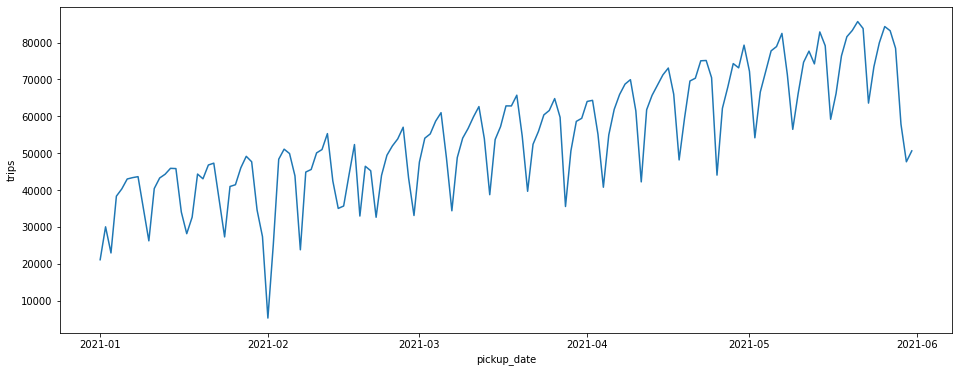

In [49]:
fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(x="pickup_date", y="trips", data = pd_df)

In [50]:
# 그래프2 : 요일별로 데이터 확인

query = """
SELECT
		c.pickup_date,
		DATE_FORMAT(c.pickup_date, 'EEEE') AS day_of_week,
		COUNT(*) AS trips
FROM
		cleaned c
GROUP BY
		c.pickup_date,
		day_of_week
"""

pd_df2 = spark.sql(query).toPandas()

In [51]:
# 원하는 순서대로 sorting 해주기 위해
# 원래는 스트링 데이터

data = pd_df2.groupby("day_of_week").trips.median().to_frame().reset_index()
data["sort_dow"] = data["day_of_week"].replace({
	"Sunday": 0,
  "Monday": 1,
  "Tuesday": 2,
  "Wednesday": 3,
  "Thursday": 4,
  "Friday": 5,
  "Saturday": 6
})

In [52]:
data.sort_values(by="sort_dow", inplace=True)

In [53]:
# 제대로 sorting 되었나 확인

data

,day_of_week,trips,sort_dow
3,Sunday,37136.5,0
1,Monday,50626.0,1
5,Tuesday,55901.0,2
6,Wednesday,59461.0,3
4,Thursday,61582.0,4
0,Friday,63487.0,5
2,Saturday,54303.5,6


**그래프 결과 2**

요일별 트렌드 확인

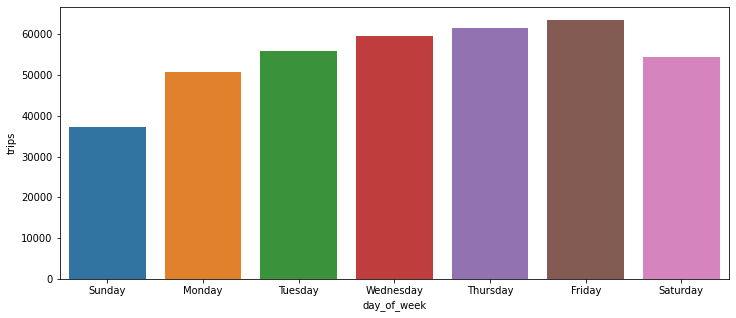

In [54]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(
		x="day_of_week",
		y="trips",
		data=data
)

In [55]:
# 그래프3 : spark에 활용하고 싶으면 udf(사용자 정의 함수)활용

def get_weekday(data):
		import calendar
		return calendar.day_name[date.weekday()]

spark.udf.register("get_weekday", get_weekday)

<function __main__.get_weekday(data)>

In [56]:
query = """
SELECT
		c.pickup_date,
		get_weekday(c.pickup_date) AS day_of_week,
		COUNT(*) AS trips
FROM
		cleaned c
GROUP BY
		c.pickup_date,
		day_of_week
"""

In [57]:
# payment type에 패턴 확인 : udf만들기

payment_type_to_string = {
		1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip",
}

def parse_payment_type(payment_type):
		return payment_type_to_string[payment_type]

spark.udf.register("parse_payment_type", parse_payment_type)

<function __main__.parse_payment_type(payment_type)>

In [58]:
query = """
SELECT 
    parse_payment_type(payment_type),
    count(*) AS trips,
    MEAN(fare_amount) AS mean_fare_amount,
    STD(fare_amount) AS stdev_fare_amount
FROM
    cleaned
GROUP BY
    payment_type
"""

spark.sql(query).show()

+--------------------------------+-------+------------------+------------------+
|parse_payment_type(payment_type)|  trips|  mean_fare_amount| stdev_fare_amount|
+--------------------------------+-------+------------------+------------------+
|                     Credit Card|6250894|11.687204222308322|10.106509253187086|
|                       No Charge|  39150|11.624684546615583|14.702459832748076|
|                         Dispute|  14542|12.152530601017737|14.185340646461905|
|                            Cash|1938037|11.567761136655276|11.214296883226515|
+--------------------------------+-------+------------------+------------------+



In [59]:
# 사용 후 종료!

spark.stop()

Reference


https://spark.apache.org/docs/latest/api/python/#